Linear model

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
plt.style.use('fivethirtyeight')
import yfinance as yf

start = "2011-01-01"

# Stap 1: Haal de historische data op voor de S&P 500 tot de huidige dag
data = yf.download("SPY", start=start, progress=False)  

# Controleer of er een MultiIndex is en maak deze plat
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.get_level_values(0)

# Verwijder uren uit de datums en formatteer als YYYY-MM-DD
data.index = data.index.strftime('%Y-%m-%d')
df.index = pd.to_datetime(df.index)

data


Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2011-01-03,98.665169,127.050003,127.599998,125.699997,126.709999,138725200
2011-01-04,98.610840,126.980003,127.370003,126.190002,127.330002,137409700
2011-01-05,99.123367,127.639999,127.720001,126.459999,126.580002,133975300
2011-01-06,98.929237,127.389999,127.830002,127.010002,127.690002,122519000
2011-01-07,98.735115,127.139999,127.769997,126.150002,127.559998,156034600
...,...,...,...,...,...,...
2024-11-21,593.669983,593.669983,595.119995,587.450012,593.400024,46750300
2024-11-22,595.510010,595.510010,596.150024,593.150024,593.659973,38226400
2024-11-25,597.530029,597.530029,600.859985,595.200012,599.520020,42441400


Intercept: 81.39216062071569
Slope: [0.11457162]
0.9213289669333375
[483.39282827]


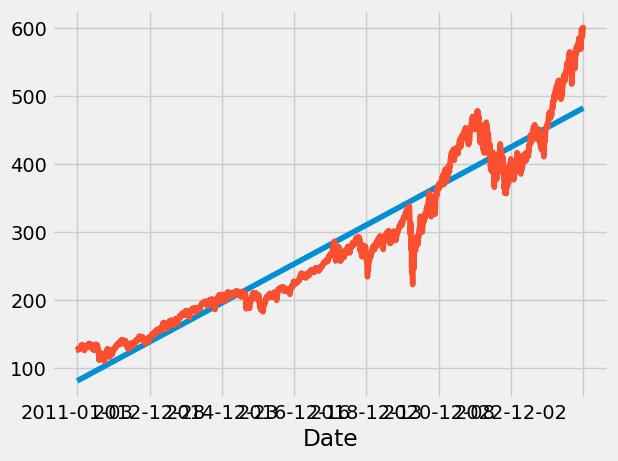

In [67]:
# Linear regression
df2 = data.copy()
df2['Numbers'] = list(range(0, len(df2)))
X = np.array(df2[['Numbers']])
y = df2["Close"].values
lin_model = LinearRegression().fit(X,y)
print('Intercept:', lin_model.intercept_)
print('Slope:', lin_model.coef_)

y_pred = lin_model.coef_ * X + lin_model.intercept_
df2['Pred'] = y_pred
df2['Pred'].plot()
df2['Close'].plot()

print(r2_score(df2['Close'], df2['Pred']))
print(lin_model.coef_ * len(df2)+1 + lin_model.intercept_)

In [68]:
# Maak een kopie van de originele DataFrame
df2 = data.copy()

# Voeg een 'Numbers'-kolom toe als onafhankelijke variabele voor de lineaire regressie
df2['Numbers'] = list(range(len(df2)))

# Definieer de input (X) en output (y) voor de lineaire regressie
X = np.array(df2[['Numbers']])  # Onafhankelijke variabele
y = df2['Close'].values  # Afhankelijke variabele

# Train het lineaire regressiemodel
lin_model = LinearRegression().fit(X, y)

# Voeg voorspellingen toe voor elke rij volgens de opgegeven formule
df2['Linear_model'] = lin_model.coef_[0] * (df2['Numbers'] + 1) + lin_model.intercept_

# Controleer de laatste paar rijen van de DataFrame
print(df2.tail())


Price        Adj Close       Close        High         Low        Open  \
Date                                                                     
2024-11-21  593.669983  593.669983  595.119995  587.450012  593.400024   
2024-11-22  595.510010  595.510010  596.150024  593.150024  593.659973   
2024-11-25  597.530029  597.530029  600.859985  595.200012  599.520020   
2024-11-26  600.650024  600.650024  601.330017  598.070007  598.799988   
2024-11-27  598.830017  598.830017  600.849976  597.280029  600.460022   

Price         Volume  Numbers  Linear_model  
Date                                         
2024-11-21  46750300     3495    481.934542  
2024-11-22  38226400     3496    482.049113  
2024-11-25  42441400     3497    482.163685  
2024-11-26  45621300     3498    482.278257  
2024-11-27  34000200     3499    482.392828  


Finance model

In [69]:
import pandas as pd
import pandas_ta as ta
df = pd.read_csv('end_set.csv', parse_dates=['Date'])
df = df[['Date', 'Close', 'High', 'Low', 'Open', 'Volume']]
df

,Date,Close,High,Low,Open,Volume
0,2011-02-15,133.009995,133.220001,132.320007,133.020004,119575400
1,2011-02-16,133.850006,134.009995,133.190002,133.460007,130183500
2,2011-02-17,134.250000,134.429993,133.339996,133.460007,109810500
3,2011-02-18,134.529999,134.690002,134.059998,134.369995,130002400
4,2011-02-22,131.830002,134.559998,131.470001,133.119995,233116400
...,...,...,...,...,...,...
3465,2024-11-21,593.669983,595.119995,587.450012,593.400024,46750300
3466,2024-11-22,595.510010,596.150024,593.150024,593.659973,38226400
3467,2024-11-25,597.530029,600.859985,595.200012,599.520020,42441400
3468,2024-11-26,600.650024,601.330017,598.070007,598.799988,45621300


In [70]:
df=df[df.High!=df.Low]
df.reset_index(inplace=True, drop=True)
df

,Date,Close,High,Low,Open,Volume
0,2011-02-15,133.009995,133.220001,132.320007,133.020004,119575400
1,2011-02-16,133.850006,134.009995,133.190002,133.460007,130183500
2,2011-02-17,134.250000,134.429993,133.339996,133.460007,109810500
3,2011-02-18,134.529999,134.690002,134.059998,134.369995,130002400
4,2011-02-22,131.830002,134.559998,131.470001,133.119995,233116400
...,...,...,...,...,...,...
3465,2024-11-21,593.669983,595.119995,587.450012,593.400024,46750300
3466,2024-11-22,595.510010,596.150024,593.150024,593.659973,38226400
3467,2024-11-25,597.530029,600.859985,595.200012,599.520020,42441400
3468,2024-11-26,600.650024,601.330017,598.070007,598.799988,45621300


In [71]:
# Calculate Bollinger Bands and RSI using pandas_ta
df.ta.bbands(append=True, length=30, std=2)
df.ta.rsi(append=True, length=14)
df["atr"] = ta.atr(low = df.Low, close = df.Close, high = df.High, length=14)

# Rename columns for clarity if necessary
df.rename(columns={
    'BBL_30_2.0': 'bbl', 'BBM_30_2.0': 'bbm', 'BBU_30_2.0': 'bbh', 'RSI_14': 'rsi'
}, inplace=True)

# Calculate Bollinger Bands Width
df['bb_width'] = (df['bbh'] - df['bbl']) / df['bbm']
df

,Date,Close,High,Low,Open,Volume,bbl,bbm,bbh,BBB_30_2.0,BBP_30_2.0,rsi,atr,bb_width
0,2011-02-15,133.009995,133.220001,132.320007,133.020004,119575400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-02-16,133.850006,134.009995,133.190002,133.460007,130183500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-02-17,134.250000,134.429993,133.339996,133.460007,109810500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-02-18,134.529999,134.690002,134.059998,134.369995,130002400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-02-22,131.830002,134.559998,131.470001,133.119995,233116400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3465,2024-11-21,593.669983,595.119995,587.450012,593.400024,46750300,568.383193,584.811668,601.240143,5.618381,0.769602,59.879812,6.075490,0.056184
3466,2024-11-22,595.510010,596.150024,593.150024,593.659973,38226400,568.598170,585.342668,602.087165,5.721263,0.803602,61.570028,5.855813,0.057213
3467,2024-11-25,597.530029,600.859985,595.200012,599.520020,42441400,568.483655,585.783002,603.082349,5.906401,0.839522,63.393317,5.841824,0.059064
3468,2024-11-26,600.650024,601.330017,598.070007,598.799988,45621300,568.534385,586.478668,604.422951,6.119330,0.894871,66.070888,5.695979,0.061193


In [72]:
def apply_total_signal(df, rsi_threshold_low=30, rsi_threshold_high=70, bb_width_threshold = 0.0015):
    # Initialize the 'TotalSignal' column
    df['TotalSignal'] = 0

    for i in range(1, len(df)):
        # Previous candle conditions
        prev_candle_closes_below_bb = df['Close'].iloc[i-1] < df['bbl'].iloc[i-1]
        prev_rsi_below_thr = df['rsi'].iloc[i-1] < rsi_threshold_low
        # Current candle conditions
        closes_above_prev_high = df['Close'].iloc[i] > df['High'].iloc[i-1]
        bb_width_greater_threshold = df['bb_width'].iloc[i] > bb_width_threshold

        # Combine conditions
        if (prev_candle_closes_below_bb and
            prev_rsi_below_thr and
            closes_above_prev_high and
            bb_width_greater_threshold):
            df.at[i, 'TotalSignal'] = 2  # Set the buy signal for the current candle

        # Previous candle conditions
        prev_candle_closes_above_bb = df['Close'].iloc[i-1] > df['bbh'].iloc[i-1]
        prev_rsi_above_thr = df['rsi'].iloc[i-1] > rsi_threshold_high
        # Current candle conditions
        closes_below_prev_low = df['Close'].iloc[i] < df['Low'].iloc[i-1]
        bb_width_greater_threshold = df['bb_width'].iloc[i] > bb_width_threshold

        # Combine conditions
        if (prev_candle_closes_above_bb and
            prev_rsi_above_thr and
            closes_below_prev_low and
            bb_width_greater_threshold):
            df.at[i, 'TotalSignal'] = 1  # Set the sell signal for the current candle


    return df

apply_total_signal(df=df, rsi_threshold_low=30, rsi_threshold_high=70, bb_width_threshold=0.001)

,Date,Close,High,Low,Open,Volume,bbl,bbm,bbh,BBB_30_2.0,BBP_30_2.0,rsi,atr,bb_width,TotalSignal
0,2011-02-15,133.009995,133.220001,132.320007,133.020004,119575400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2011-02-16,133.850006,134.009995,133.190002,133.460007,130183500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2011-02-17,134.250000,134.429993,133.339996,133.460007,109810500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,2011-02-18,134.529999,134.690002,134.059998,134.369995,130002400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2011-02-22,131.830002,134.559998,131.470001,133.119995,233116400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3465,2024-11-21,593.669983,595.119995,587.450012,593.400024,46750300,568.383193,584.811668,601.240143,5.618381,0.769602,59.879812,6.075490,0.056184,0
3466,2024-11-22,595.510010,596.150024,593.150024,593.659973,38226400,568.598170,585.342668,602.087165,5.721263,0.803602,61.570028,5.855813,0.057213,0
3467,2024-11-25,597.530029,600.859985,595.200012,599.520020,42441400,568.483655,585.783002,603.082349,5.906401,0.839522,63.393317,5.841824,0.059064,0
3468,2024-11-26,600.650024,601.330017,598.070007,598.799988,45621300,568.534385,586.478668,604.422951,6.119330,0.894871,66.070888,5.695979,0.061193,0


In [73]:
len(df[df.TotalSignal != 0])

26

In [74]:
import numpy as np
def pointpos(x):
    if x['TotalSignal']==2:
        return x['Low']-1e-4
    elif x['TotalSignal']==1:
        return x['High']+1e-4
    else:
        return np.nan

df['pointpos'] = df.apply(lambda row: pointpos(row), axis=1)

In [75]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
st=0
dfpl = df[st:st+350]#.set_index("Gmt time")
# Create a plot with 2 rows
fig = make_subplots(rows=2, cols=1)

# Add candlestick plot on the first row
fig.add_trace(go.Candlestick(x=dfpl.index,
                             open=dfpl['Open'],
                             high=dfpl['High'],
                             low=dfpl['Low'],
                             close=dfpl['Close']),
              row=1, col=1)

# Add Bollinger Bands, EMA lines on the same subplot
fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['bbl'],
                         line=dict(color='green', width=1),
                         name="BBL"),
              row=1, col=1)
fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['bbh'],
                         line=dict(color='green', width=1),
                         name="BBU"),
              row=1, col=1)

# Add markers for trade entry points on the same subplot
fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['pointpos'], mode="markers",
                         marker=dict(size=8, color="MediumPurple"),
                         name="entry"),
              row=1, col=1)

# Add markers for trade entry points on the same subplot
fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['rsi'], 
                         line=dict(color='green', width=2),
                         name="BBU"),
              row=2, col=1)

fig.update_layout(width=1200, height=800, sliders=[])
fig.show()

In [76]:
from backtesting import Strategy
from backtesting import Backtest

dfopt = df[0:10000]
def SIGNAL():
    return dfopt.TotalSignal

class MyStrat(Strategy):
    mysize = 0.1
    slcoef = 3
    TPcoef = 2
    
    def init(self):
        super().init()
        self.signal1 = self.I(SIGNAL)

    def next(self):
        super().next()
        slatr = self.slcoef*self.data.atr[-1]
        tpatr = self.TPcoef*self.data.atr[-1]
    
        if self.signal1==2 and len(self.trades)==0:
            sl1 = self.data.Close[-1] - slatr
            tp1 = self.data.Close[-1] + tpatr
            self.buy(sl=sl1, tp=tp1, size=self.mysize)

        if self.signal1==1 and len(self.trades)==0:
            sl1 = self.data.Close[-1] + slatr
            tp1 = self.data.Close[-1] - tpatr
            self.sell(sl=sl1, tp=tp1, size=self.mysize)
        
bt = Backtest(dfopt, MyStrat, cash=10000, margin=1/10, commission=0.001) #0.0002
stats, heatmap = bt.optimize(slcoef=[i/10 for i in range(10, 16)],
                    TPcoef=[i/10 for i in range(10, 21)],
                    maximize='Return [%]', max_tries=300,
                        random_state=0,
                        return_heatmap=True)
stats

c:\Users\DCG13\Documents\Alpaca\trading1_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

C:\Users\DCG13\AppData\Local\Temp\ipykernel_18604\1785803022.py:32: UserWarning:

Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.



Start                                     0.0
End                                    3469.0
Duration                               3469.0
Exposure Time [%]                    2.881844
Equity Final [$]                 10438.220884
Equity Peak [$]                  10628.898318
Return [%]                           4.382209
Buy & Hold Return [%]              350.214301
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                   -6.586921
Avg. Drawdown [%]                   -2.818603
Max. Drawdown Duration                 1966.0
Avg. Drawdown Duration             399.285714
# Trades                                 26.0
Win Rate [%]                        46.153846
Best Trade [%]                       5.925946
Worst Trade [%]                     -3.154034
Avg. Trade [%]                    

In [82]:
# Laad een voorbeelddataset
df = pd.read_csv('end_set.csv', parse_dates=['Date'])

# Pas het model toe
df_with_results = fin_model_1_optimized(df)

# Bekijk de resultaten
print(df_with_results.head(20))


         Date   Adj Close       Close        High         Low        Open  \
0  2011-02-15  103.293663  133.009995  133.220001  132.320007  133.020004   
1  2011-02-16  103.945984  133.850006  134.009995  133.190002  133.460007   
2  2011-02-17  104.256615  134.250000  134.429993  133.339996  133.460007   
3  2011-02-18  104.474068  134.529999  134.690002  134.059998  134.369995   
4  2011-02-22  102.377281  131.830002  134.559998  131.470001  133.119995   
5  2011-02-23  101.748215  131.020004  132.070007  130.210007  131.750000   
6  2011-02-24  101.678360  130.929993  131.440002  129.699997  130.880005   
7  2011-02-25  102.765579  132.330002  132.410004  131.399994  131.479996   
8  2011-02-28  103.402374  133.149994  133.320007  132.380005  132.820007   
9  2011-03-01  101.678360  130.929993  133.690002  130.889999  133.570007   
10 2011-03-02  101.895805  131.210007  131.820007  130.350006  130.750000   
11 2011-03-03  103.650841  133.470001  133.619995  132.389999  132.399994   

In [98]:
df3['Probability_fin_model_1'].tail(20)

3450    0.393890
3451    0.348827
3452    0.365419
3453    0.269729
3454    0.165297
3455    0.130899
3456    0.116886
3457    0.105791
3458    0.126366
3459    0.127430
3460    0.164437
3461    0.266822
3462    0.235591
3463    0.231203
3464    0.220862
3465    0.193798
3466    0.173404
3467    0.155517
3468    0.138285
3469    0.151957
Name: Probability_fin_model_1, dtype: float64